In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

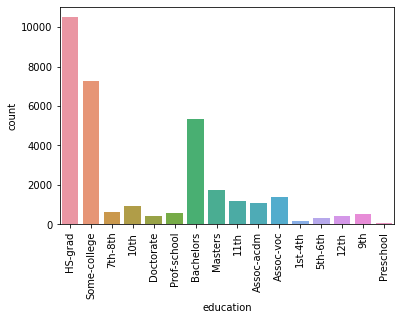

In [4]:
sns.countplot(df['education'],label='count')
plt.xticks(rotation=90)

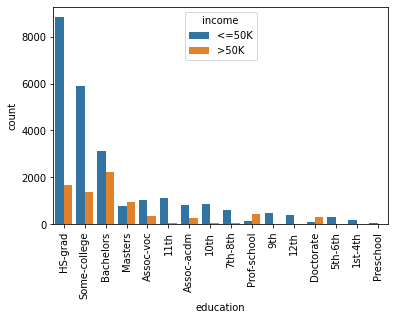

In [5]:
sns.countplot(x='education',hue='income',order=df['education'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [6]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

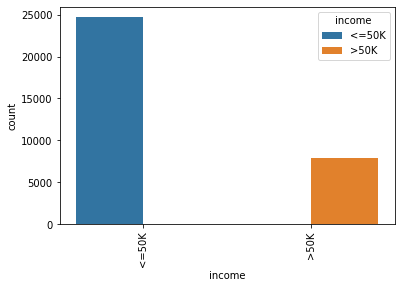

In [7]:
sns.countplot(x='income',hue='income',order=df['income'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [8]:
categorical_keep_columns = ['age','workclass','education','relationship','marital.status']
df[categorical_keep_columns]

,age,workclass,education,relationship,marital.status
0,90,?,HS-grad,Not-in-family,Widowed
1,82,Private,HS-grad,Not-in-family,Widowed
2,66,?,Some-college,Unmarried,Widowed
3,54,Private,7th-8th,Unmarried,Divorced
4,41,Private,Some-college,Own-child,Separated
...,...,...,...,...,...
32556,22,Private,Some-college,Not-in-family,Never-married
32557,27,Private,Assoc-acdm,Wife,Married-civ-spouse
32558,40,Private,HS-grad,Husband,Married-civ-spouse
32559,58,Private,HS-grad,Unmarried,Widowed


In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [28]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
df['education.num']= label_encoder.fit_transform(df['education'])
df['relationship.num']= label_encoder.fit_transform(df['relationship'])
df['marital.status.num']= label_encoder.fit_transform(df['marital.status'])
df['workclass.num']= label_encoder.fit_transform(df['workclass'])

In [29]:
df['workclass.num'].unique()

array([0, 4, 7, 1, 6, 5, 2, 8, 3])

In [30]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,relationship.num,marital.status.num,workclass.num
0,90,?,77053,11,11,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1,6,0
1,82,Private,132870,11,11,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1,6,4
2,66,?,186061,15,15,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,4,6,0
3,54,Private,140359,5,5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,4,0,4
4,41,Private,264663,15,15,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,15,15,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,4,4
32557,27,Private,257302,7,7,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,5,2,4
32558,40,Private,154374,11,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,2,4
32559,58,Private,151910,11,11,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4,6,4


In [31]:
keep_columns = ['age','workclass.num','education.num','relationship.num','marital.status.num']
df[keep_columns]

,age,workclass.num,education.num,relationship.num,marital.status.num
0,90,0,11,1,6
1,82,4,11,1,6
2,66,0,15,4,6
3,54,4,5,4,0
4,41,4,15,3,5
...,...,...,...,...,...
32556,22,4,15,1,4
32557,27,4,7,5,2
32558,40,4,11,0,2
32559,58,4,11,4,6


In [32]:
X = df[keep_columns].values
Y = df['income'].values

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [34]:
gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=1,max_features=2,max_depth=2,random_state=0)
gb_clf.fit(X_train,Y_train)

print('Accuracy Score (training): ',gb_clf.score(X_train,Y_train))
print('Accuracy Score (test): ',gb_clf.score(X_test,Y_test))

Accuracy Score (training):  0.8307739557739557
Accuracy Score (test):  0.826654383540611
